# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [30]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

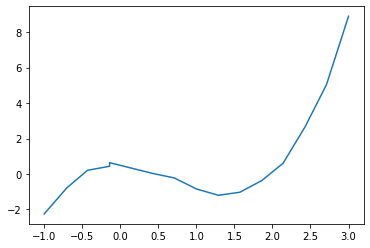

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x,y)

In [74]:
def build_design_matrix(x, m):
    rows = len(x)
    cols = m + 1
    matrix = np.ndarray((rows,cols))
    for i in range(rows):
        matrix[i,:] = [x[i]**j for j in range(m+1)]
    return matrix

def solve_normal_equations(A,y):
    lhs = np.matmul(A.T,A)
    _y = np.array(y).reshape(len(y),1)
    rhs = np.matmul(A.T,y)
    lhs_inv = np.linalg.inv(lhs)
    
    return np.matmul(lhs_inv, rhs)
    
max(x)

3

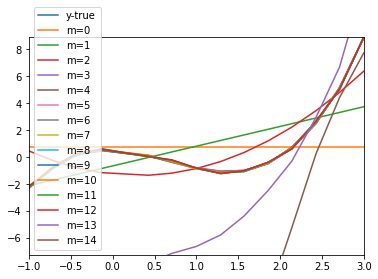

In [78]:
def plot_m(m, x, y, ax):
    A = build_design_matrix(x,m)
    normal_eq_betas = solve_normal_equations(A,y)
    approx_y = np.matmul(A, normal_eq_betas)    
    ax.plot(x, approx_y, label='m={}'.format(m))
    
fig, ax = plt.subplots()
ax.plot(x, y, label='y-true')
ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y)-5, max(y)])

for i in range(len(x)):
    plot_m(i, x, y, ax)
ax.legend()

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [86]:
def calc_sigma(y_approx, y, m):
    n = len(y)
    coef = 1/(n-m)
    sq_error = np.sum((y_approx - y)**2)
    return sq_error*coef

lowest sigma for m is: 11


[7.495379555555556,
 4.4502158667062055,
 2.4534269975791783,
 0.012470899099731586,
 0.012460407583509954,
 0.012600059280330676,
 0.011590813700606682,
 0.012289041756436652,
 0.01156937152473382,
 0.01293104518211908,
 0.014257919894575331,
 0.005380885249149115,
 0.01951695766954134,
 378.7073273589948,
 30652.005347832168]

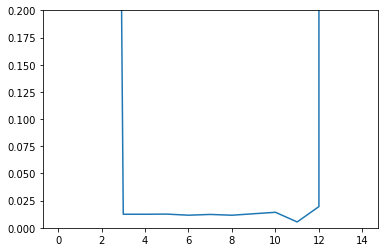

In [137]:
norm_eq_sigmas = []
for i in range(len(x)):
    A = build_design_matrix(x,i)
    normal_eq_betas = solve_normal_equations(A,y)
    approx_y = np.matmul(A, normal_eq_betas)
    norm_eq_sigmas.append(calc_sigma(approx_y, y, i))

fig, ax = plt.subplots()
ax.set_ylim([0,0.2])
ax.plot(range(len(x)), norm_eq_sigmas)    
print('lowest sigma for m is: {}'.format(norm_eq_sigmas.index(min(norm_eq_sigmas))))
norm_eq_sigmas

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

'All values of m (3 <= m <= 11) work well.'

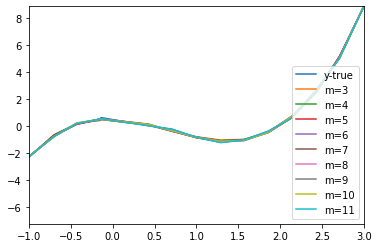

In [103]:
def plot_m(m, x, y, ax):
    A = build_design_matrix(x,m)
    normal_eq_betas = solve_normal_equations(A,y)
    approx_y = np.matmul(A, normal_eq_betas)    
    ax.plot(x, approx_y, label='m={}'.format(m))
    
fig, ax = plt.subplots()
ax.plot(x, y, label='y-true')
ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y)-5, max(y)])

for i in range(3,12):
    plot_m(i, x, y, ax)
ax.legend()

"All values of m (3 <= m <= 11) work well."

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

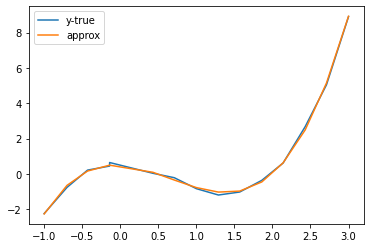

In [138]:
m = 3 # using 3 since it is the simplest of the working solutions above
A = build_design_matrix(x, m)
Q, R = np.linalg.qr(A)
r = np.matmul(Q.T,y).reshape(m+1,1)
R_inv = np.linalg.inv(R)
betas = np.matmul(R_inv, r)

y_approx = np.matmul(A, betas)
fig, ax = plt.subplots()
ax.plot(x, y, label='y-true')
ax.plot(x, y_approx, label='approx')
ax.legend()

In [145]:
qr_sigma = calc_sigma(np.squeeze(y_approx), y, 3)
print('QR sigma: {}'.format(qr_sigma))
norm_eq_sig = norm_eq_sigmas[m]
print('Normal Eq sigma: {}'.format(norm_eq_sig))
print('Result: The sigmas are nearly identical.')

QR sigma: 0.012470899099731654
Normal Eq sigma: 0.012470899099731586
Result: The sigmas are nearly identical.


# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

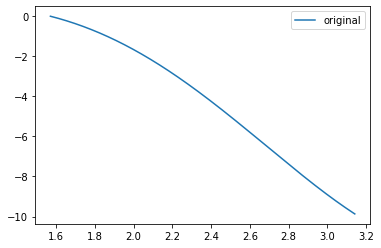

In [239]:
x = np.linspace(np.pi/2, np.pi, 1000)
y = (x**2) * np.cos(x)
fig, ax = plt.subplots()
ax.plot(x, y, label='original')
ax.legend()

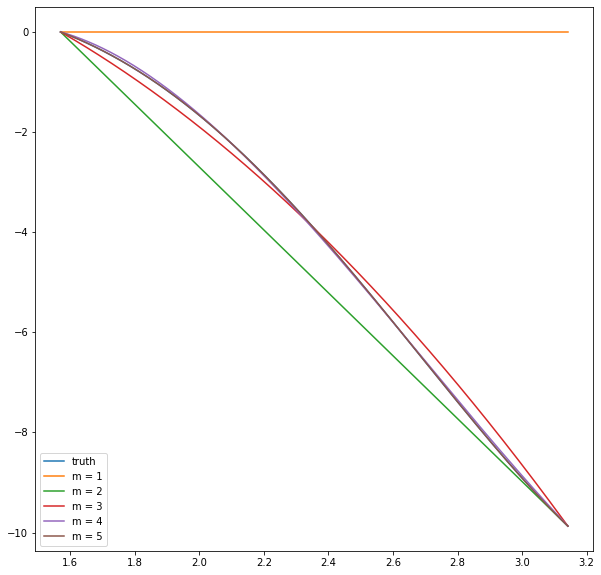

In [238]:
def func(x):
    return (x**2) * np.cos(x)

def lagrange_k(x, xk, k):
    val = 1
    
    for j in range(len(xk)):
        if j != k:
            num = x - xk[j]
            den = xk[k] - xk[j]
            val *= num/den
    return val
        

x_vals = np.linspace(np.pi/2, np.pi, 1000)
y_true = func(x_vals)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x_vals, y_true, label='truth')
for k in range(1,6):
    xk = np.linspace(np.pi/2, np.pi, k)
    yk = func(xk)
    interps = []
    for x_val in x_vals:
        interp_val = np.sum([yk[i]*lagrange_k(x_val, xk, i) for i in range(k)])
        interps.append(interp_val)

    ax.plot(x_vals, interps, label='m = {}'.format(k))

ax.legend()

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

array([-1.46557292, -0.78539816, -0.1052234 ])

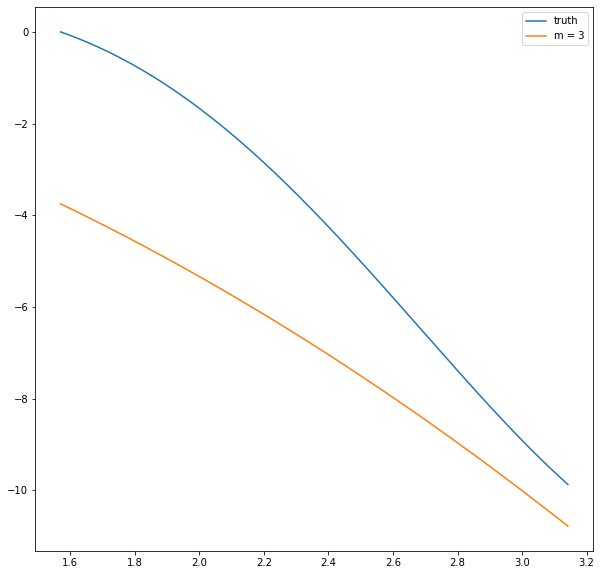

In [237]:
def func(x):
    return (x**2) * np.cos(x)


def lagrange_k(x, xk, k):
    val = 1
    
    for j in range(len(xk)):
        if j != k:
            num = x - xk[j]
            den = xk[k] - xk[j]
            val *= num/den
    return val
   
    
def cheb_nodes(a, b, n):
    k = np.arange(n)
    
    return 0.5*(a-b) + 0.5*(b-a) * np.cos((2*(n-k) - 1) * np.pi/(2*n))
    
    
x_vals = np.linspace(np.pi/2, np.pi, 1000)
y_true = func(x_vals)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x_vals, y_true, label='truth')
m = 3
xk = cheb_nodes(np.pi/2, np.pi, m)
yk = func(xk)
interps = []
for x_val in x_vals:
    interp_val = np.sum([yk[i]*lagrange_k(x_val, xk, i) for i in range(m)])
    interps.append(interp_val)

ax.plot(x_vals, interps, label='m = {}'.format(m))

ax.legend()
cheb_nodes(np.pi/2, np.pi, 3)

In [240]:
# Lagrange appears to do better